<a href="https://colab.research.google.com/github/Vijaybedage/EDA-LIST-OF-UNICORN-STARTUP-COMPANIES-ANALYSIS/blob/main/list_of_unicorn_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Steps for Analysis of Startup Data

1. **Load and Explore the Dataset**:
    - Import necessary libraries (Pandas, NumPy, Matplotlib, Seaborn).
    - Load the data into a Pandas DataFrame.
    - Check for missing values or any inconsistencies.
    - Preview the first few rows to get an understanding of the structure.

2. **Data Cleaning**:
    - Clean the columns (e.g., ensure the "Valuation" is numeric and remove any commas).
    - Handle any missing values (either by filling or dropping them).
    - Convert the "Valuation date" to a datetime format if it is not already.

3. **Descriptive Statistics**:
    - Calculate basic statistics (e.g., mean, median, standard deviation) for the valuation.
    - Identify the top 10 highest-valued companies and visualize them.

4. **Visualizations**:
    - Plot the distribution of company valuations (e.g., histogram, box plot).
    - Create a bar chart to show the number of companies in each industry.
    - Visualize the number of companies by country.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('List_of_Unicorn _Startup_Companies.csv')

# Preview the first few rows
df.head(100)

,Unnamed: 0,Company,Valuation(US$ billions),Valuation date,Industry,Country/countries,Founder(s)
0,0,ByteDance,140,June 2022[13],Internet,China,"Zhang Yiming, Liang Rubo"
1,1,SpaceX,127,June 2022[13],Aerospace,US,Elon Musk
2,2,Shein,100,June 2022[13],E-commerce,China,Chris Xu
3,3,Stripe,50,March 2023[13],Financial services,US / Ireland,Patrick and John Collison
4,4,Canva,40,September 2021[16],Graphic design,Australia,"Melanie Perkins, Clifford Obrecht, Cameron Adams"
...,...,...,...,...,...,...,...
95,95,Back Market,5.8,August 2022[94],Marketplace,France,NaN
96,96,Vice Media,5.7,February 2020[99],Mass media,US,NaN
97,97,Contentsquare,5.6,August 2022[94],Software as a service,France,NaN
98,98,Fivetran,5.6,September 2021[100],Data infrastructure,US,NaN


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               658 non-null    int64 
 1   Company                  658 non-null    object
 2   Valuation(US$ billions)  658 non-null    object
 3   Valuation date           658 non-null    object
 4   Industry                 594 non-null    object
 5   Country/countries        658 non-null    object
 6   Founder(s)               138 non-null    object
dtypes: int64(1), object(6)
memory usage: 36.1+ KB


In [ ]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                   0
Company                      0
Valuation(US$ billions)      0
Valuation date               0
Industry                    64
Country/countries            0
Founder(s)                 520
dtype: int64

In [ ]:
# Convert 'Valuation(US$ billions)' to numeric, handling errors
df['Valuation(US$ billions)'] = pd.to_numeric(df['Valuation(US$ billions)'], errors='coerce')

# Filter
print(df[df['Valuation date'].isnull()])

 #And printing company those where valuation between 1 to 2 us$ billions
earning_between_1_to_2_df =  df[df['Valuation(US$ billions)'].between(1,2)]
earning_between_1_to_2_df

Empty DataFrame
Columns: [Unnamed: 0, Company, Valuation(US$ billions), Valuation date, Industry, Country/countries, Founder(s)]
Index: []


,Unnamed: 0,Company,Valuation(US$ billions),Valuation date,Industry,Country/countries,Founder(s)
243,243,Deliverect,1.40,January 2022[235],Ordering software for POS,Belgium,NaN
288,288,Hive,2.00,April 2021[278],Artificial intelligence,US,"Kevin Guo, Dmitriy Karpman"
289,289,Mural,2.00,July 2021[279],Technology,Argentina / US,Patricio Jutard
290,290,Aiven,2.00,October 2021[280],Data infrastructure,Finland,NaN
291,291,AppsFlyer,2.00,November 2020[281],Mobile marketing analytics,Israel / US,NaN
...,...,...,...,...,...,...,...
648,648,Ecovadis,1.00,August 2022[94],"Environmental,_social,_and_corporate_governance",France,NaN
649,649,Scandit,1.00,February 2022[564],Software,Switzerland,"Samuel Mueller, Christian Floerkemeier, Christ..."
652,652,Einride,1.44,April 2022[59],Technology,Sweden,NaN
654,654,Neo Financial,1.00,May 2022[567],Financial technology,Canada,"Andrew Chau, Jeff Adamson, Kris Read"


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
653    False
654    False
655    False
656    False
657    False
Length: 658, dtype: bool

In [ ]:
df.describe()

,Unnamed: 0,Valuation(US$ billions)
count,658.000000,480.000000
mean,328.500000,5.120042
std,190.092521,10.916350
min,0.000000,1.000000
25%,164.250000,1.590000
50%,328.500000,2.600000
75%,492.750000,5.000000
max,657.000000,140.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'Company', 'Valuation(US$ billions)', 'Valuation date',
       'Industry', 'Country/countries', 'Founder(s)'],
      dtype='object')

In [ ]:
# Basic Descriptive Statistics
df['Valuation(US$ billions)'].describe()

In [ ]:
# Top 5 highest-valued companies
top_companies = df.nlargest(10, 'Valuation(US$ billions)')
top_companies[['Company', 'Valuation(US$ billions)']]

,Company,Valuation(US$ billions)
0,ByteDance,140.0
1,SpaceX,127.0
2,Shein,100.0
3,Stripe,50.0
4,Canva,40.0
5,Checkout.com,40.0
7,Databricks,38.0
8,Revolut,33.0
9,Epic Games,31.5
10,Telegram,30.0


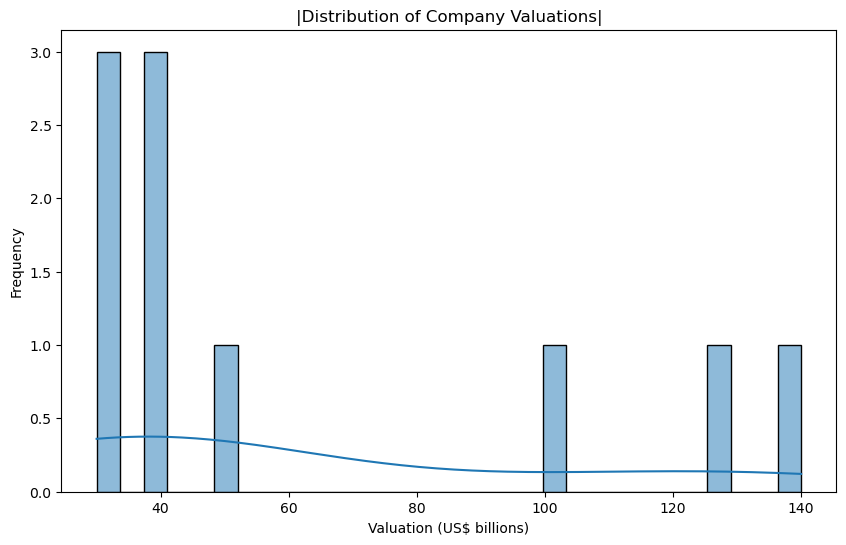

In [ ]:
# Visualize distribution of company valuations
plt.figure(figsize=(10, 6))
sns.histplot(top_companies['Valuation(US$ billions)'], bins=30, kde=True)
plt.title('|Distribution of Company Valuations|')
plt.xlabel('Valuation (US$ billions)')
plt.ylabel('Frequency')
plt.show()

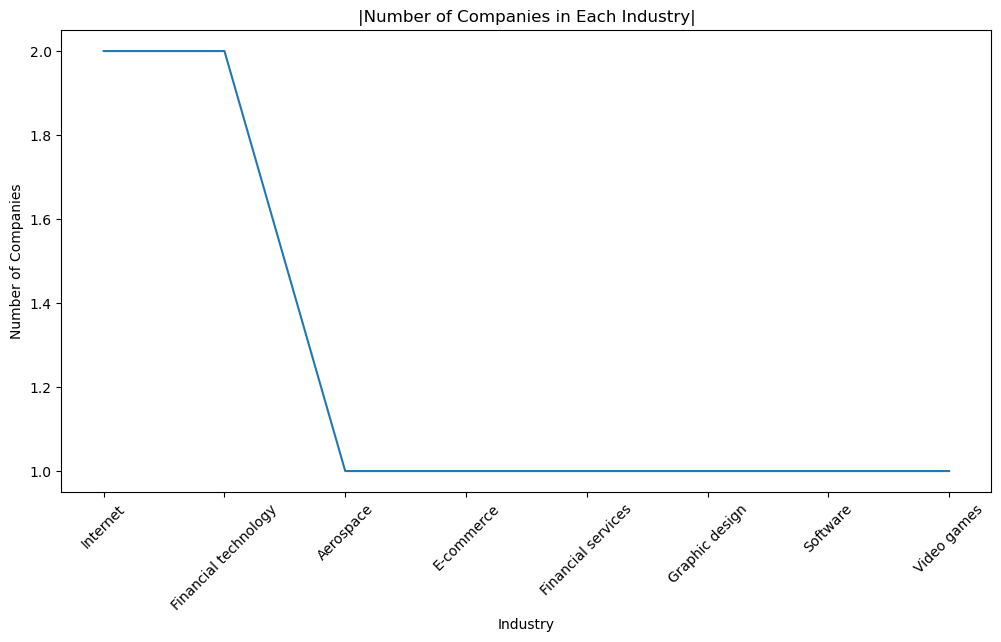

In [ ]:
# Visualize companies by industry
industry_counts = top_companies['Industry'].value_counts()
plt.figure(figsize=(12, 6))
sns.lineplot(x=industry_counts.index, y=industry_counts.values)
plt.title('|Number of Companies in Each Industry|')
plt.xticks(rotation=45)
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.show()

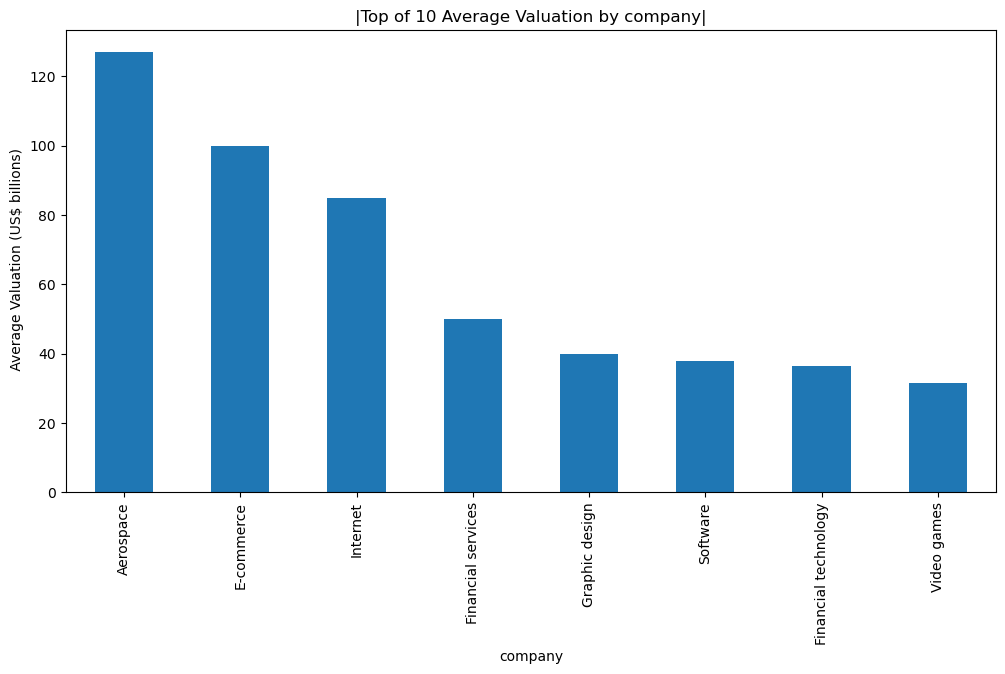

In [ ]:
# Analysis of average valuation by industry
industry_avg_valuation =top_companies.groupby('Industry')['Valuation(US$ billions)'].mean().sort_values(ascending=False)
industry_avg_valuation.plot(kind='bar', figsize=(12, 6))
plt.title('|Top of 10 Average Valuation by company|')
plt.xlabel('company')
plt.ylabel(' Average Valuation (US$ billions)')
plt.show()

In [ ]:
indian_unicorn_companyies = df.groupby(['Country/countries']).get_group('India')
data = indian_unicorn_companyies.head(10)
data

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_16408\3495806145.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  indian_unicorn_companyies = df.groupby(['Country/countries']).get_group('India')


,Unnamed: 0,Company,Valuation(US$ billions),Valuation date,Industry,Country/countries,Founder(s)
13,13,Byju's,22,June 2022[13],Educational technology,India,"Byju Raveendran, Divya Gokulnath"
41,41,Swiggy,10.7,January 2022[44],Food delivery,India,"Nandan Reddy, Sriharsha Majety"
53,53,Oyo,9.6,August 2021[56],Hospitality,India,Ritesh Agarwal
67,67,Dream11,8,November 2021[71],Fantasy sports,India,"Harsh Jain, Bhavit Sheth"
73,73,Razorpay,7.5,December 2021[77],Financial technology,India,"Harshil Mathur, Shashank Kumar"
75,75,Ola Cabs,7.3,December 2021[79],Transportation,India,"Bhavish Aggarwal, Ankit Bhati"
87,87,CRED,6.4,June 2022[91],Financial technology,India,Kunal Shah
99,99,PharmEasy,5.6,October 2021[101],Health technology,India,Siddharth Shah
102,102,PhonePe,5.5,December 2020[104],Financial technology,India,"Sameer Nigam, Rahul Chari"
116,116,OfBusiness,5,December 2021[118],B2B e-commerce,India,"Bhuvan Gupta, Vasant Sridhar, Ruchi Kalra, Nit..."


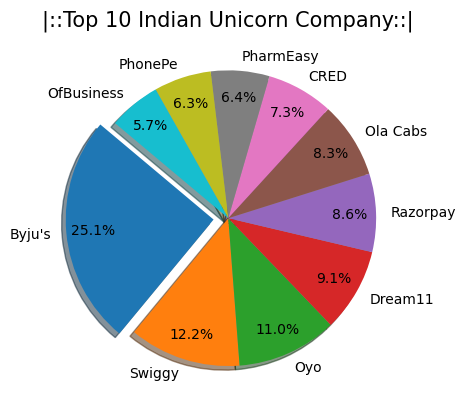

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating the DataFrame
indian_unicorn_companies = pd.DataFrame(data)

# Extracting values for the pie chart
x = indian_unicorn_companies["Valuation(US$ billions)"]
y = indian_unicorn_companies["Company"]

# Exploding the largest slice
explode = [0.1 if value == max(x) else 0 for value in x]

# Plotting the pie chart
plt.pie(x, labels=y, autopct='%0.1f%%', pctdistance=0.82, explode=explode, labeldistance=1.1,startangle=140,shadow=True)
plt.title('|::Top 10 Indian Unicorn Company::|', fontsize=15)
# Display the chart
plt.show()


In [ ]:
China_unicorn_companyies = df.groupby(['Country/countries']).get_group('China')
data_china = China_unicorn_companyies.head(10)
data_china

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_8260\2393334256.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  Cindian_unicorn_companyies = df.groupby(['Country/countries']).get_group('China')


,Unnamed: 0,Company,Valuation(US$ billions),Valuation date,Industry,Country/countries,Founder(s)
0,0,ByteDance,140.0,June 2022[13],Internet,China,"Zhang Yiming, Liang Rubo"
2,2,Shein,100.0,June 2022[13],E-commerce,China,Chris Xu
15,15,Xiaohongshu,20.0,June 2022[13],E-commerce,China,"Miranda Qu Fang, Charlwin Mao Wenchao"
20,20,Yuanfudao,15.5,October 2020[23],Educational technology,China,NaN
22,22,DJI,15.0,September 2016[1],Technology,China,Frank Wang (Wang Tao)
31,31,Bitmain,12.0,June 2018[citation needed],Cryptocurrency,China,NaN
38,38,ZongMu Technology,11.0,June 2021[41],Self-driving cars,China,NaN
43,43,Chehaoduo,10.0,July 2021[46],Marketplace,China,NaN
57,57,HeyTea,9.3,July 2021[61],Retail,China,NaN
81,81,WeDoctor,6.8,February 2021[85],Healthcare,China,NaN


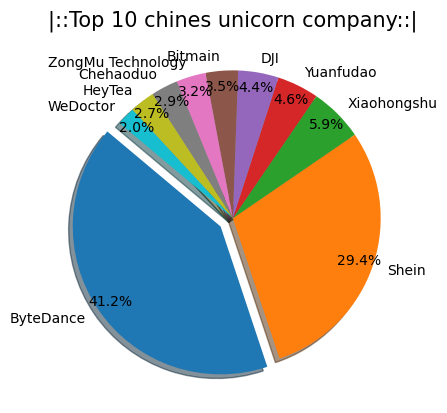

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating the DataFrame
China_unicorn_companyies = pd.DataFrame(data_china)

# Extracting values for the pie chart
x = China_unicorn_companyies["Valuation(US$ billions)"]
y = China_unicorn_companyies["Company"]

# Exploding the largest slice
explode = [0.1 if value == max(x) else 0 for value in x]

# Plotting the pie chart
plt.pie(x, labels=y, autopct='%0.1f%%', pctdistance=.898, explode=explode, labeldistance=1.1,startangle=140,shadow=True)

plt.title('|::Top 10 chines unicorn company::|', fontsize=15)
# Display the chart
plt.show()


In [ ]:
US_Ireland_unicorn_companyies = df.groupby(['Country/countries']).get_group('US / Ireland')

data_us_ireland = Cindian_unicorn_companyies.head(10)

data_us_ireland

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_8260\3663362520.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  US_Ireland_unicorn_companyies = df.groupby(['Country/countries']).get_group('US / Ireland')


,Unnamed: 0,Company,Valuation(US$ billions),Valuation date,Industry,Country/countries,Founder(s)
0,0,ByteDance,140.0,June 2022[13],Internet,China,"Zhang Yiming, Liang Rubo"
2,2,Shein,100.0,June 2022[13],E-commerce,China,Chris Xu
15,15,Xiaohongshu,20.0,June 2022[13],E-commerce,China,"Miranda Qu Fang, Charlwin Mao Wenchao"
20,20,Yuanfudao,15.5,October 2020[23],Educational technology,China,NaN
22,22,DJI,15.0,September 2016[1],Technology,China,Frank Wang (Wang Tao)
31,31,Bitmain,12.0,June 2018[citation needed],Cryptocurrency,China,NaN
38,38,ZongMu Technology,11.0,June 2021[41],Self-driving cars,China,NaN
43,43,Chehaoduo,10.0,July 2021[46],Marketplace,China,NaN
57,57,HeyTea,9.3,July 2021[61],Retail,China,NaN
81,81,WeDoctor,6.8,February 2021[85],Healthcare,China,NaN


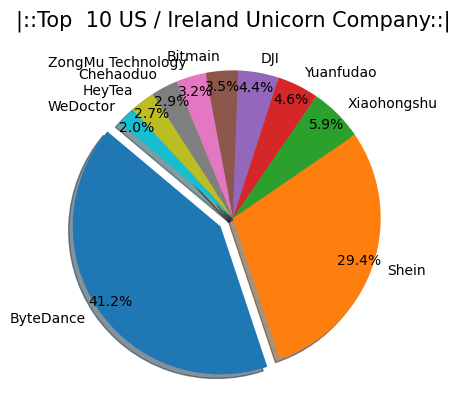

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating the DataFrame
US_Ireland_unicorn_companyies= pd.DataFrame(data_china)

# Extracting values for the pie chart
x = US_Ireland_unicorn_companyies["Valuation(US$ billions)"]
y = US_Ireland_unicorn_companyies["Company"]

# Exploding the largest slice
explode = [0.1 if value == max(x) else 0 for value in x]

# Plotting the pie chart
plt.pie(x, labels=y, autopct='%0.1f%%', pctdistance=.898, explode=explode, labeldistance=1.1,startangle=140,shadow=True)

plt.title('|::Top  10 US / Ireland Unicorn Company::|', fontsize=15)
# Display the chart
plt.show()


In [ ]:
usa = df.groupby(['Country/countries']).get_group('US')

usa = us.head(10)

usa

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_16080\4001442446.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  usa = df.groupby(['Country/countries']).get_group('US')


,Unnamed: 0,Company,Valuation(US$ billions),Valuation date,Industry,Country/countries,Founder(s)
1,1,SpaceX,127.0,June 2022[13],Aerospace,US,Elon Musk
6,6,Instacart,24.0,March 2022[13],Retail,US,"Apoorva Mehta, Max Mullen, Brandon Leonardo"
7,7,Databricks,38.0,June 2022[13],Software,US,Ali Ghodsi
9,9,Epic Games,31.5,June 2022[13],Video games,US,Tim Sweeney
11,11,Fanatics,27.0,June 2022[13],E-commerce,US,"Alan Trager, Mitch Trager, Michael Rubin[18]"
12,12,Chime,25.0,June 2022[13],Financial services,US,Chris Britt and Ryan King
16,16,Miro,17.5,January 2022[19],Software,US,Andrey Khusid
18,18,Nature's Fynd,NaN,July 2021[21],Consumer packaged goods,US,NaN
21,21,Discord,15.0,September 2021[24],Software,US,"Jason Citron, Stanislav Vishnevsky"
23,23,GoPuff,15.0,July 2021[25],E-commerce,US,"Yakir Gola, Rafael Ilishayev"


In [ ]:

top10comanies =top_companies.groupby('Industry')['Valuation(US$ billions)'].mean().sort_values(ascending=False)
top10comanies.to_csv('top10india.csv', index=False)

In [ ]:
Cindian_unicorn_companyies = df.groupby(['Country/countries']).get_group('China')
Cindian_unicorn_companyies.to_csv('top10chaina.csv', index=False)

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_8260\1022162326.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  Cindian_unicorn_companyies = df.groupby(['Country/countries']).get_group('China')


In [ ]:
US_Ireland_unicorn_companyies = df.groupby(['Country/countries']).get_group('US / Ireland')
US_Ireland_unicorn_companyies.to_csv('top10usireland.csv', index=False)

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_8260\49097905.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  US_Ireland_unicorn_companyies = df.groupby(['Country/countries']).get_group('US / Ireland')


In [ ]:
top100list = df.head(100)
top100list.to_csv('top10usireland.csv', index=False)